### Tutorial - sklearn digits
Example from sklearn docs on using kerneldensity estimator for recognising digts, generating from model.
Cross validation and PCA process shown in the example.
As well as plotting images/subplots

best bandwidth: 3.79269019073225


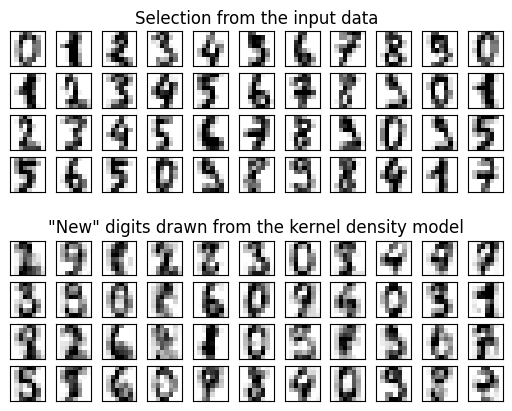

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
data[0]

array([-1.25946033, 21.27488355, -9.46307454, 13.01422329, -7.1288404 ,
       -7.44070997,  3.25282148,  2.55378942, -0.57737766,  3.62963029,
        2.5753539 ,  1.55878702,  0.83600337, -3.41490284,  5.81665236])

In [12]:
new_data= kde.sample(44, random_state=0)[0]

In [13]:
new_data = pca.inverse_transform(new_data)
new_data

array([-5.40271322e-17,  1.74396947e+00,  1.55081805e+01,  1.75284697e+01,
        7.74018536e+00, -3.09327881e+00, -2.27205301e+00, -3.45140585e-01,
        1.94026148e-02,  7.37756430e+00,  1.41560101e+01,  1.29235303e+01,
        1.57925696e+01, -6.30810725e-01, -3.52360867e+00, -2.70499765e-01,
        6.84243490e-03,  4.87113048e+00,  5.46649539e+00,  9.21770380e+00,
        1.44801209e+01,  3.98068617e-01, -1.63096269e+00, -7.12264292e-02,
        5.55139748e-04,  5.19504242e-01,  3.70041786e+00,  1.00058312e+01,
        1.00043017e+01,  3.73483379e+00,  1.33497986e+00,  1.70426346e-04,
        0.00000000e+00,  5.70558147e-01,  4.83147245e+00,  1.08931314e+01,
        8.53822037e+00,  2.98576298e+00,  1.62744719e+00,  0.00000000e+00,
        1.91040979e-02,  4.78846659e-01,  5.03716449e+00,  1.38852035e+01,
        8.37307470e+00,  2.39950024e+00,  3.33270741e+00,  8.65581780e-02,
        1.92271486e-02,  1.54084061e+00,  1.26023509e+01,  1.65199913e+01,
        1.38134865e+01,  

In [17]:
new_data = new_data.reshape((4, -1))
new_data

array([[-5.40271322e-17,  1.74396947e+00,  1.55081805e+01,
         1.75284697e+01,  7.74018536e+00, -3.09327881e+00,
        -2.27205301e+00, -3.45140585e-01,  1.94026148e-02,
         7.37756430e+00,  1.41560101e+01,  1.29235303e+01,
         1.57925696e+01, -6.30810725e-01, -3.52360867e+00,
        -2.70499765e-01],
       [ 6.84243490e-03,  4.87113048e+00,  5.46649539e+00,
         9.21770380e+00,  1.44801209e+01,  3.98068617e-01,
        -1.63096269e+00, -7.12264292e-02,  5.55139748e-04,
         5.19504242e-01,  3.70041786e+00,  1.00058312e+01,
         1.00043017e+01,  3.73483379e+00,  1.33497986e+00,
         1.70426346e-04],
       [ 0.00000000e+00,  5.70558147e-01,  4.83147245e+00,
         1.08931314e+01,  8.53822037e+00,  2.98576298e+00,
         1.62744719e+00,  0.00000000e+00,  1.91040979e-02,
         4.78846659e-01,  5.03716449e+00,  1.38852035e+01,
         8.37307470e+00,  2.39950024e+00,  3.33270741e+00,
         8.65581780e-02],
       [ 1.92271486e-02,  1.54084061e

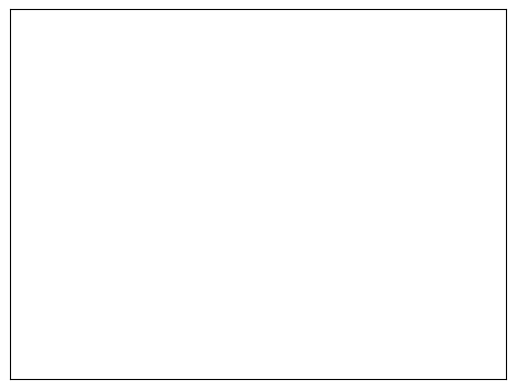

In [31]:
fig, ax = plt.subplots( subplot_kw=dict(xticks=[], yticks=[]))

In [29]:

# for j in range(11):
#     ax[4, j].set_visible(False)
#     for i in range(4):

im = ax.imshow(
    new_data[0].reshape((-1, 1)), cmap=plt.cm.binary, interpolation="nearest"
)
# im.set_clim(0, 16)

# ax[0, 5].set_title("Selection from the input data")
# ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()
fig.show()

/tmp/ipykernel_178616/2060302983.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [30]:
plt.show()